In [2]:
from pyuvdata.uvdata.mir_parser import MirParser
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mir_data = MirParser("211009_04:56:19", has_auto=True)

In [4]:
mir_data.unload_data()
mir_data.select(
    where=[
        ("sb", "eq", "u"),
        ("corrchunk","eq",4),
        ("ant", "eq",1),
        ("antrx","eq",0),
    ],
    reset=True
)
mir_data.load_data(load_auto=True, apply_tsys=False)

f_sky = (
    mir_data.ac_data['fsky'][0]
    + (np.arange(mir_data.ac_data['nch'][0]) - np.arange(mir_data.ac_data['nch'][0])/2)*mir_data.ac_data['fres'][0]*1e-3
)
f_sky = f_sky[1024:-1024]

In [12]:
sort_idx = np.argsort(mir_data.eng_data['actual_el'])

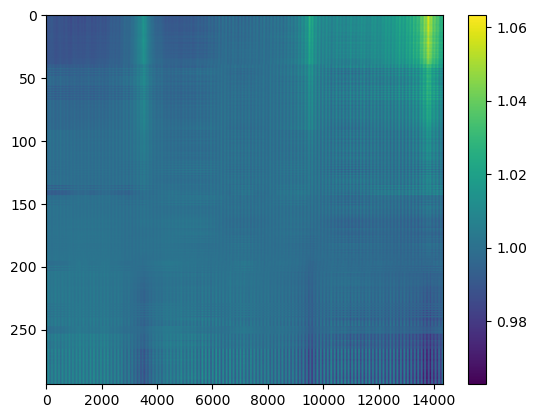

In [13]:
data_stack = np.vstack([item['data'] for item in mir_data.auto_data.values()])[:, 1024:-1024]
n_int, n_chan = data_stack.shape

data_stack = data_stack/np.repeat(np.median(data_stack,axis=0).reshape([1,-1]), n_int, axis=0)
data_stack = data_stack/np.repeat(np.median(data_stack,axis=1).reshape([-1,1]), n_chan, axis=1)

plt.imshow(data_stack[sort_idx, :], aspect='auto')
plt.colorbar()

(0.0, 1000.0)

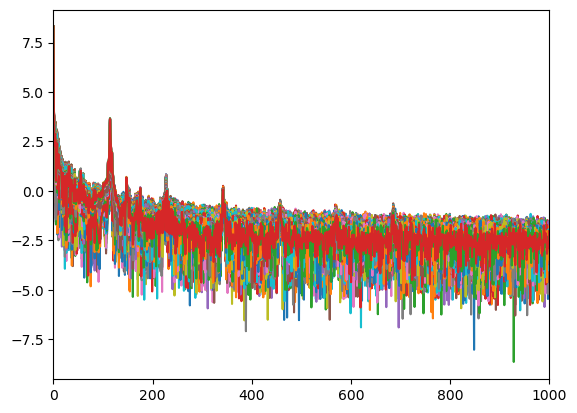

In [24]:
test = 1.0 * (np.log10(np.abs(np.fft.fft(data_stack[sort_idx, :], axis=1))**2.0).T)
plt.plot(test)
plt.xlim([0, 1000])

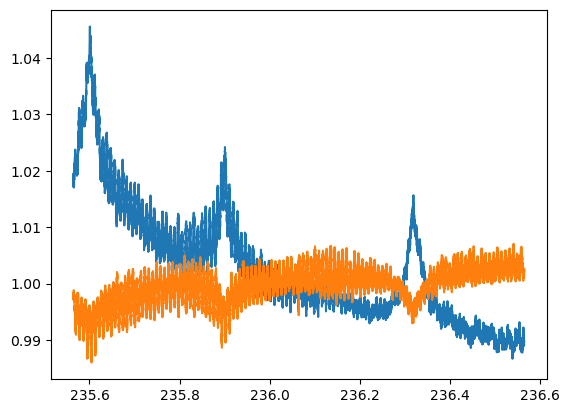

In [7]:
plt.plot(f_sky, data_stack[50])
plt.plot(f_sky, data_stack[250])
